In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/Social_Network_Ads.csv")
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
df = df[["Age","EstimatedSalary","Purchased"]]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(df.iloc[:,:2],df["Purchased"],test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scalar

In [6]:
 from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
# we give scaler object DF but recieve  a numpy array so lets convert the array to a DF
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [10]:
X_test_scaled

Age  EstimatedSalary
0   -0.771013         0.497201
1    0.013305        -0.572804
2   -0.280814         0.150172
3   -0.771013         0.265849
4   -0.280814        -0.572804
..        ...              ...
115  1.091743        -0.139018
116  0.699584         1.769639
117 -0.672973         0.555039
118  0.797624         0.352606
119  0.895664        -0.543885

[120 rows x 2 columns]

## Now lets Visualize the Effects of Scaling

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Estimated Salery')]

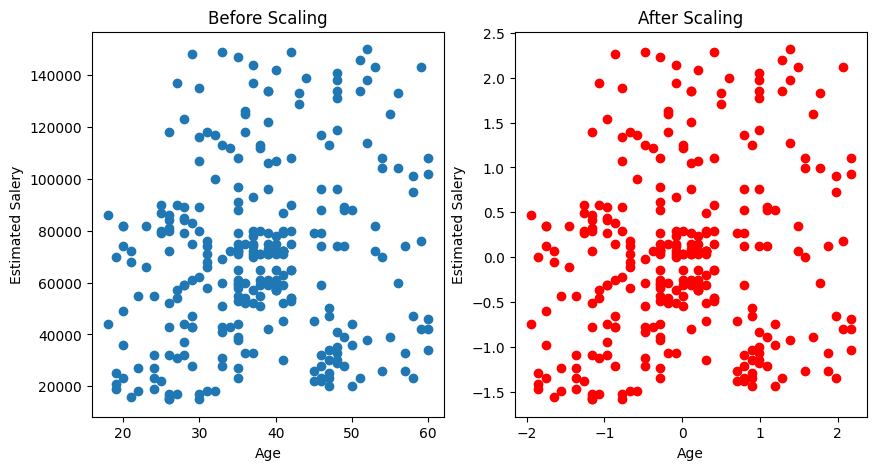

In [29]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(X_train["Age"],X_train["EstimatedSalary"],"o")
axs[0].set_title("Before Scaling")
axs[1].plot(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],"or")
axs[1].set_title("After Scaling")

axs[0].set(xlabel="Age",ylabel="Estimated Salery")
axs[1].set(xlabel="Age",ylabel="Estimated Salery")






<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

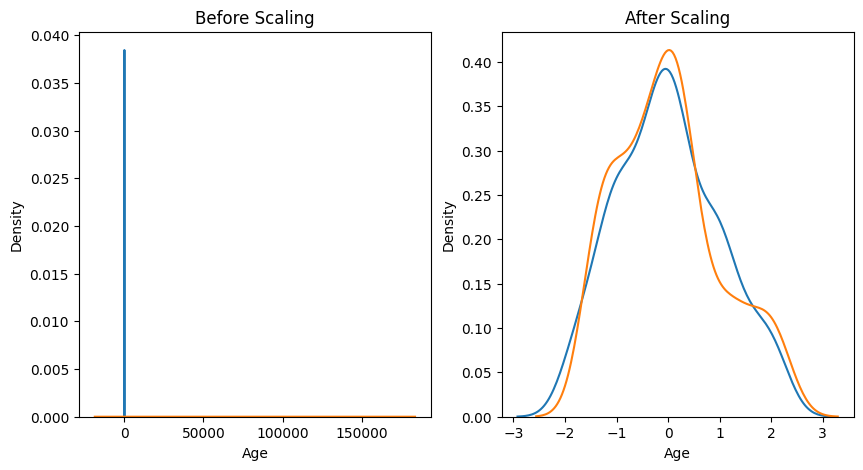

In [33]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)


ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)


### Now lets see why scaling is important

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [36]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("Actual : ", accuracy_score(Y_test,y_pred))
print("Scaled : ", accuracy_score(Y_test,y_pred_scaled))

Actual :  0.6583333333333333
Scaled :  0.8666666666666667
